Regression Simple  :
Question:Comment ApplicantIncome influence-t-il le montant du LoanAmount ?
Y a-t-il une relation linéaire entre le revenu du demandeur et le montant du prêt ?

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Lire le fichier Excel
df = pd.read_excel("train.xlsx")


In [4]:
# df.head permet de voir les premières lignes chargées de notre fichier Excel
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN               360   
1             4583             1508.0       128.0               360   
2             3000                0.0        66.0               360   
3             2583             2358.0       120.0               360   
4             6000                0.0       141.0               360   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
# Récupérer le prix : les valeurs observées pour la variable Cible
y = df['ApplicantIncome']
# Récupérer les variables prédictives : La superficie en pieds² et le nb chambre
X = df['LoanAmount']

In [8]:
# Ajouter une constante à la variable indépendante (prédicteur) X
X = sm.add_constant(X)

# Vérifier les valeurs manquantes
print(X.isnull().sum())
print(y.isnull().sum())

# Remplacer les valeurs manquantes dans X par la moyenne
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Remplacer les valeurs manquantes dans y si nécessaire

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher un résumé des résultats de la régression
print(model.summary())

const         0
LoanAmount    2
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:        ApplicantIncome   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sat, 11 May 2024   Prob (F-statistic):           7.00e-42
Time:                        21:20:39   Log-Likelihood:                -5063.5
No. Observations:                 510   AIC:                         1.013e+04
Df Residuals:                     508   BIC:                         1.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

Interprétation des Résultats :

D'après les résultats de la régression simple :

Coefficient (coef) : Le coefficient associé à ApplicantIncome est estimé à 38.2993. Cela signifie que, selon ce modèle, pour chaque unité d'augmentation de ApplicantIncome, le montant du prêt (LoanAmount) augmente en moyenne de 38.2993 unités.

P-value (P>|t|) : La valeur p associée au coefficient de ApplicantIncome est inférieure à 0.001 (0.000). Cela indique que le coefficient est statistiquement significatif à un niveau de confiance élevé (généralement 95% ou plus). En d'autres termes, il est peu probable que ce résultat soit dû au hasard.

R-squared (R-squared) : Le coefficient de détermination (R-squared) est estimé à 0.304. Cela signifie que 30.4% de la variance dans le montant du prêt (LoanAmount) est expliquée par le revenu du demandeur (ApplicantIncome).

Réponse :

Selon ces résultats de la régression simple, il existe une relation linéaire entre le revenu du demandeur (ApplicantIncome) et le montant du prêt (LoanAmount). Le coefficient positif de 38.2993 suggère que les emprunteurs avec des revenus plus élevés tendent à demander des montants de prêt plus élevés, en moyenne. De plus, la valeur p très faible indique que cette relation est statistiquement significative.

Ainsi, nous pouvons conclure qu'il existe une influence positive et significative du revenu du demandeur sur le montant du prêt, selon les résultats de cette analyse de régression simple.


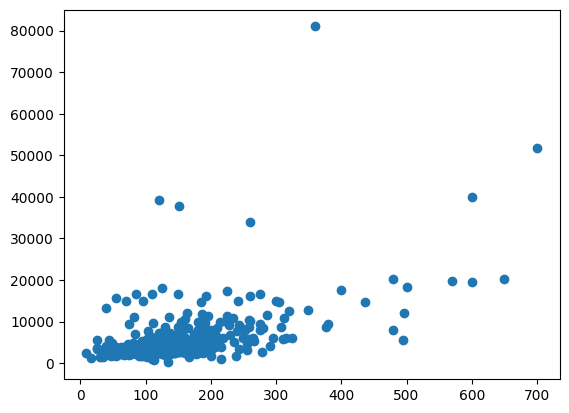

In [6]:
plt.scatter (X,y)
plt.show()

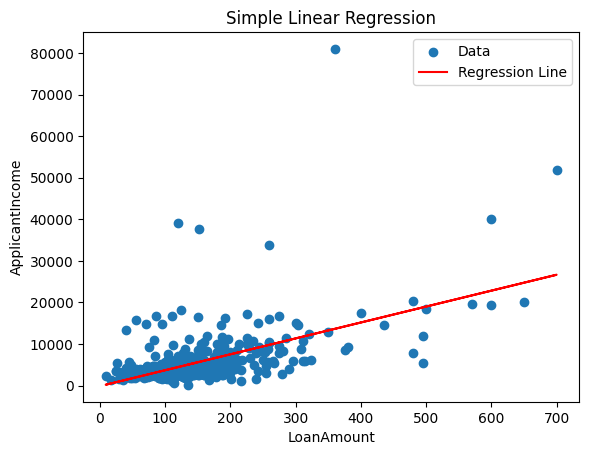

In [9]:
# Tracer le nuage de points avec la droite de régression
plt.scatter(X['LoanAmount'], y, label='Data')  # Nuage de points des données

# Prédire les valeurs de y (Current Price) en utilisant le modèle
y_pred = model.predict(X)
plt.plot(X['LoanAmount'], y_pred, color='red', label='Regression Line')  # Droite de régression

plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

Régression Multiple :
Comment le revenu du demandeur (ApplicantIncome) et la durée du prêt (Loan_Amount_Term) influent-ils collectivement sur le montant du prêt (LoanAmount) demandé dans les demandes de prêt hypothécaire ?


In [10]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Lire le fichier Excel
df = pd.read_excel("train.xlsx")

In [12]:
# Sélectionner les variables pertinentes pour la régression multiple
X = df[['ApplicantIncome', 'Loan_Amount_Term']]  # Variables indépendantes (predicteurs)
y = df['LoanAmount']  # Variable dépendante (réponse)

In [13]:
# Ajouter une constante à la variable indépendante (prédicteur) X
X = sm.add_constant(X)

# Vérifier les valeurs manquantes
print(X.isnull().sum())
print(y.isnull().sum())

# Remplacer les valeurs manquantes dans X par la moyenne
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Remplacer les valeurs manquantes dans y si nécessaire

# Ajuster le modèle de régression linéaire simple
model = sm.OLS(y, X).fit()

# Afficher un résumé des résultats de la régression
print(model.summary())

const               0
ApplicantIncome     0
Loan_Amount_Term    0
dtype: int64
2
                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     113.0
Date:                Sat, 11 May 2024   Prob (F-statistic):           2.54e-41
Time:                        21:40:13   Log-Likelihood:                -2899.0
No. Observations:                 510   AIC:                             5804.
Df Residuals:                     507   BIC:                             5817.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

R-squared (0.308) : Ce coefficient de détermination indique que 30,8% de la variation de LoanAmount est expliquée par les variables indépendantes ApplicantIncome et Loan_Amount_Term. En d'autres termes, le modèle permet de prédire environ 30,8% de la variation du montant du prêt.
30,8% de la variation du montant du prêt (Loan_Amount) est expliquée par les deux variables indépendantes.
L'effet de la durée du prêt sur le montant du prêt prédit n'est pas statistiquement significatif dans ce modèle.

In [14]:
# Fonction de prédiction du montant du prêt (LoanAmount) à partir de ApplicantIncome et Loan_Amount_Term
def predict_loan_amount(applicant_income, loan_amount_term):
    # Extraire les coefficients du modèle
    beta_0 = model.params['const']
    beta_1 = model.params['ApplicantIncome']
    beta_2 = model.params['Loan_Amount_Term']

    # Calculer la prédiction du montant du prêt (LoanAmount) en utilisant les coefficients du modèle
    predicted_loan_amount = beta_0 + beta_1 * applicant_income + beta_2 * loan_amount_term
    return predicted_loan_amount

# Exemple d'utilisation de la fonction de prédiction
applicant_income = 5000  # Exemple de revenu du demandeur
loan_amount_term = 360  # Exemple de durée du prêt en mois

predicted_loan_amount = predict_loan_amount(applicant_income, loan_amount_term)
print("Prédiction du montant du prêt (LoanAmount) :", predicted_loan_amount)

Prédiction du montant du prêt (LoanAmount) : 143.92722639027784


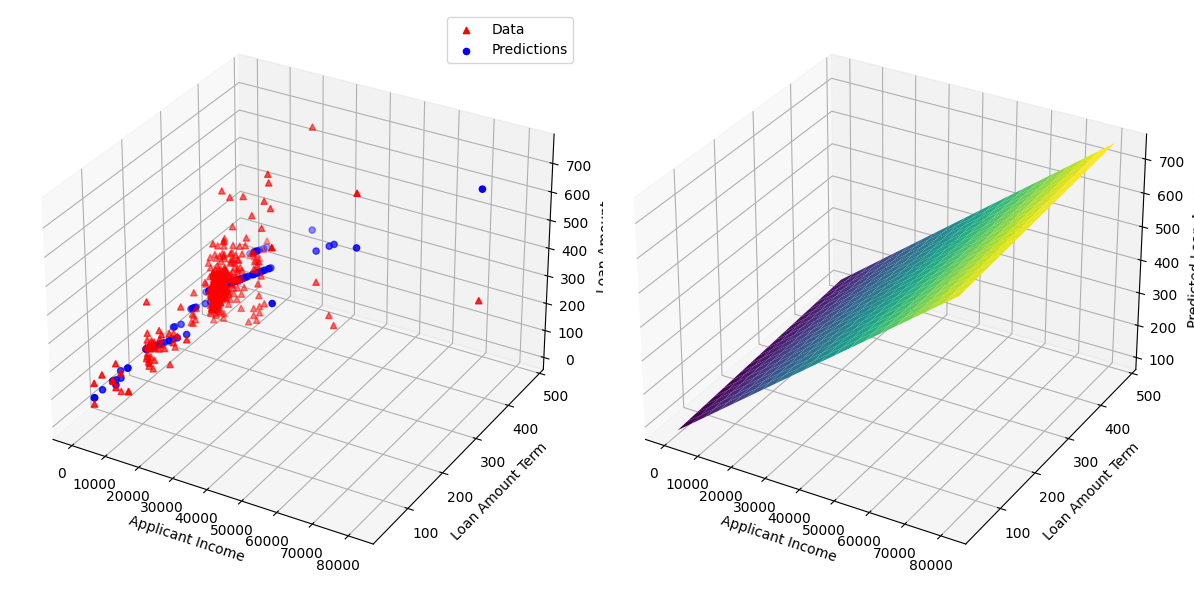

In [15]:
# Prédire le montant du prêt pour toutes les observations dans le jeu de données
predicted_loan_amounts = []
for idx, row in df.iterrows():
    predicted_amount = predict_loan_amount(row['ApplicantIncome'], row['Loan_Amount_Term'])
    predicted_loan_amounts.append(predicted_amount)

# Créer une figure pour afficher les graphiques en 3D
fig = plt.figure(figsize=(12, 6))

# Premier sous-trace : Afficher les données réelles et les prédictions
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df['ApplicantIncome'], df['Loan_Amount_Term'], df['LoanAmount'], c='r', marker='^', label='Data')
ax1.scatter(df['ApplicantIncome'], df['Loan_Amount_Term'], predicted_loan_amounts, c='b', marker='o', label='Predictions')
ax1.set_xlabel('Applicant Income')
ax1.set_ylabel('Loan Amount Term')
ax1.set_zlabel('Loan Amount')
ax1.legend()

# Deuxième sous-trace : Afficher la surface de prédiction en 3D
# Créer une grille de points pour la surface de prédiction
income_grid, term_grid = np.meshgrid(np.linspace(df['ApplicantIncome'].min(), df['ApplicantIncome'].max(), 20),
                                     np.linspace(df['Loan_Amount_Term'].min(), df['Loan_Amount_Term'].max(), 20))
predicted_loan_grid = predict_loan_amount(income_grid.flatten(), term_grid.flatten())
predicted_loan_grid = np.array(predicted_loan_grid).reshape(income_grid.shape)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(income_grid, term_grid, predicted_loan_grid, cmap='viridis')
ax2.set_xlabel('Applicant Income')
ax2.set_ylabel('Loan Amount Term')
ax2.set_zlabel('Predicted Loan Amount')

# Afficher la figure
plt.tight_layout()
plt.show()